Number ofcentroids::
MIN == 2
MAX == Number of Observations
find distance of each pointusing Eucledian distance formula
find iteration ofthe groups
WCSS = 
Elbow method defines how many groups are needed to be formedb


#MinMaxScaler   =  X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv("income.csv")

In [11]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [12]:
df.drop(columns = "Name",inplace =True)

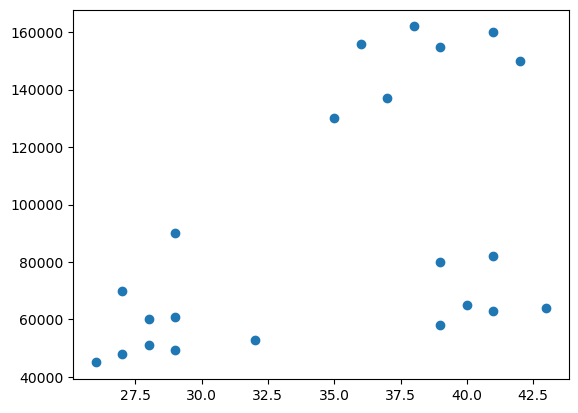

In [13]:
plt.scatter(df["Age"],df["Income($)"])
plt.show()

In [42]:
from sklearn.cluster import KMeans

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
km = KMeans(n_clusters=3,random_state=88)
km.fit(df)

KMeans(n_clusters=3, random_state=88)

In [46]:
sc = MinMaxScaler()
df["Age"] = sc.fit_transform(df[["Age"]])
df["Income($)"] = sc.fit_transform(df[["Income($)"]])

In [47]:
group = km.predict(df)

In [48]:
df["cluster"] = group

In [49]:
df

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [50]:
df1 =  df[df["cluster"]==0]
df2 =  df[df["cluster"]==1]
df3 =  df[df["cluster"]==2]

In [51]:
df3

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
19,0.764706,0.299145,2
20,0.882353,0.316239,2


In [52]:
df2

,Age,Income($),cluster
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1
10,0.647059,0.786325,1


In [53]:
df1

,Age,Income($),cluster
2,0.176471,0.136752,0
3,0.117647,0.128205,0
11,0.000000,0.000000,0
12,0.058824,0.025641,0
13,0.117647,0.051282,0
14,0.176471,0.038462,0
15,0.352941,0.068376,0
16,0.823529,0.170940,0
17,0.882353,0.153846,0
18,1.000000,0.162393,0


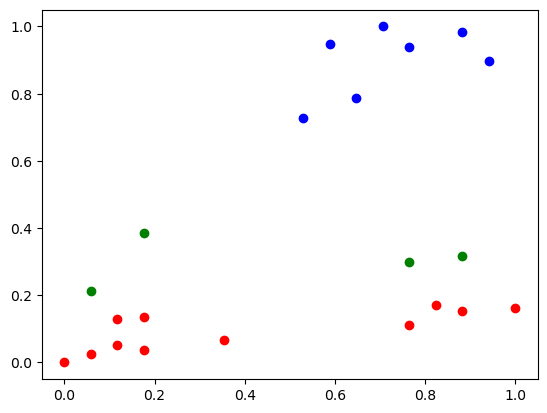

In [54]:
plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="blue")
plt.scatter(df3["Age"],df3["Income($)"],color="green")
plt.show()

In [46]:
sc = MinMaxScaler()
df["Age"] = sc.fit_transform(df[["Age"]])
df["Income($)"] = sc.fit_transform(df[["Income($)"]])

In [57]:
df.drop(columns="cluster",inplace =True)

In [58]:
km1 = KMeans(n_clusters=3,random_state=88)
km1.fit(df)

KMeans(n_clusters=3, random_state=88)

In [59]:
df["cluster"]=km1.predict(df)

In [60]:
df1 =  df[df["cluster"]==0]
df2 =  df[df["cluster"]==1]
df3 =  df[df["cluster"]==2]

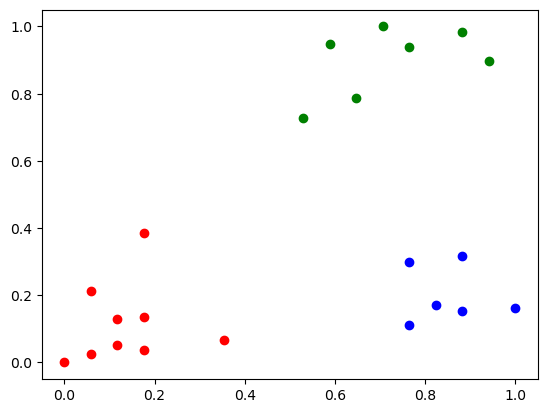

In [61]:
plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="blue")
plt.scatter(df3["Age"],df3["Income($)"],color="green")
plt.show()

In [62]:
#Centroid finding
km1.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

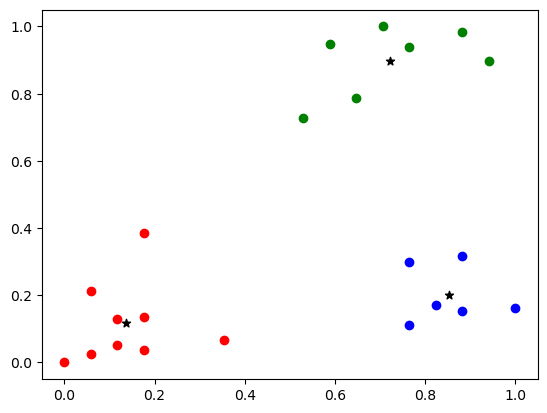

In [66]:
plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="blue")
plt.scatter(df3["Age"],df3["Income($)"],color="green")
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],marker="*",color="k")
plt.show()

In [71]:
wcss=[]              #Weights
nclus = []           #clusters
for i in range(2,21):
    km = KMeans(n_clusters=i,random_state=88)
    km.fit(df)
    wcss.append(km.inertia_)
    nclus.append(i)

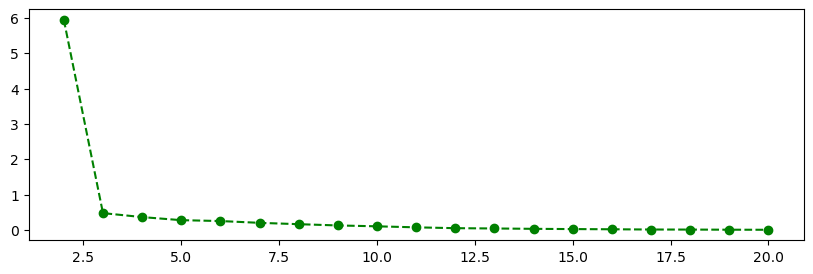

In [72]:
plt.figure(figsize=(10,3))
plt.plot(nclus,wcss,"go--")
plt.show()

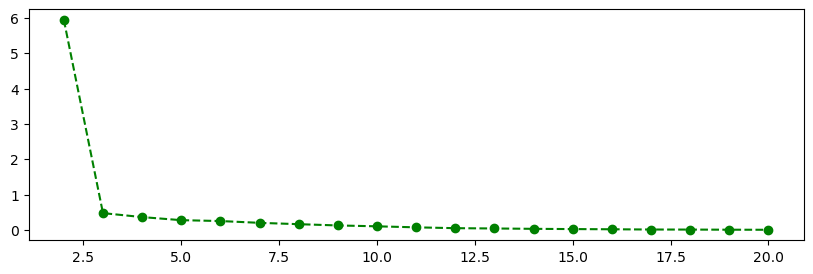

In [72]:
plt.figure(figsize=(10,3))
plt.plot(nclus,wcss,"go--")
plt.show()

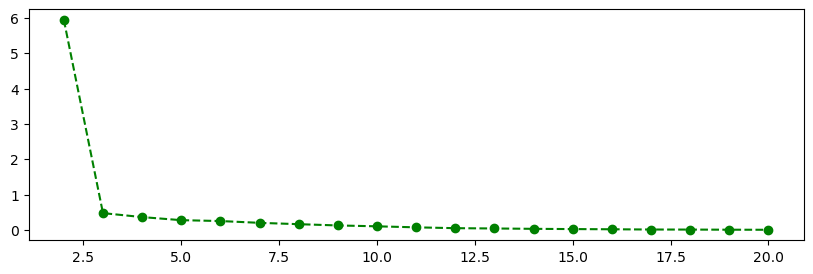

In [72]:
plt.figure(figsize=(10,3))
plt.plot(nclus,wcss,"go--")
plt.show()

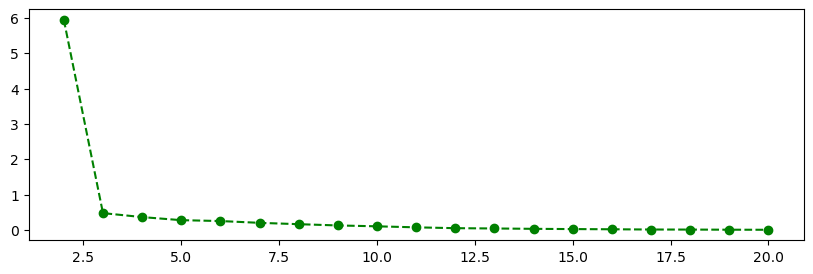

In [72]:
plt.figure(figsize=(10,3))
plt.plot(nclus,wcss,"go--")
plt.show()